# EDA and data Cleaning-3

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ingestion of the data 
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Student Name,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Result
0,John Doe,2,3,2,Monday,Pass
1,Jane Smith,3,2,2,Tuesday,Pass
2,Student 1,2,3,4,Monday,Pass
3,Student 2,3,4,1,Tuesday,Pass
4,Student 3,4,1,2,Wednesday,Fail


In [4]:
# 1-Data cleaning


In [5]:
# Checking for the missing values
df.isnull().sum()

Student Name             0
Physics Study Hours      0
Chemistry Study Hours    0
Biology Study Hours      0
Study Day                0
Result                   0
dtype: int64

No missing values here

In [6]:
# Find duplicated rows
duplicated_rows = df[df.duplicated()]

In [7]:
duplicated_rows.count()

Student Name             0
Physics Study Hours      0
Chemistry Study Hours    0
Biology Study Hours      0
Study Day                0
Result                   0
dtype: int64

In [8]:
duplicated_rows

,Student Name,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Result


In [9]:
df.shape

(400, 6)

In [10]:
#Removing duplicated rows 
df=df.drop_duplicates()

In [11]:
df.shape

(400, 6)

 No Duplicates Rows

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Student Name           400 non-null    object
 1   Physics Study Hours    400 non-null    int64 
 2   Chemistry Study Hours  400 non-null    int64 
 3   Biology Study Hours    400 non-null    int64 
 4   Study Day              400 non-null    object
 5   Result                 400 non-null    object
dtypes: int64(3), object(3)
memory usage: 21.9+ KB


In [13]:
# Removing irrelevant columns
df=df.drop('Student Name',axis=1)

In [14]:
df.head()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Result
0,2,3,2,Monday,Pass
1,3,2,2,Tuesday,Pass
2,2,3,4,Monday,Pass
3,3,4,1,Tuesday,Pass
4,4,1,2,Wednesday,Fail


In [15]:
#Rename 'Result' column to 'Exam Result'
df.rename(columns={'Result': 'Exam Result'}, inplace=True)

In [16]:
df.head()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Exam Result
0,2,3,2,Monday,Pass
1,3,2,2,Tuesday,Pass
2,2,3,4,Monday,Pass
3,3,4,1,Tuesday,Pass
4,4,1,2,Wednesday,Fail


In [17]:
# preprocessing 
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
df['Study Day']=le.fit_transform(df['Study Day'])

In [18]:
df.head()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Exam Result
0,2,3,2,1,Pass
1,3,2,2,3,Pass
2,2,3,4,1,Pass
3,3,4,1,3,Pass
4,4,1,2,4,Fail


In [19]:
df['Exam Result']=le.fit_transform(df['Exam Result'])

In [20]:
df.head()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Exam Result
0,2,3,2,1,1
1,3,2,2,3,1
2,2,3,4,1,1
3,3,4,1,3,1
4,4,1,2,4,0


In [21]:
#Feature scaling
scaler = StandardScaler()
numeric_cols = ['Physics Study Hours', 'Chemistry Study Hours', 'Biology Study Hours']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [22]:
df.head()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Exam Result
0,-0.449013,0.443634,-0.444979,1,1
1,0.449013,-0.452596,-0.444979,3,1
2,-0.449013,0.443634,1.343880,1,1
3,0.449013,1.339864,-1.339408,3,1
4,1.347040,-1.348827,-0.444979,4,0


In [23]:
# summary  of statistics
df.describe()

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day,Exam Result
count,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,0.000000,2.486900e-16,-1.332268e-16,2.005000,0.670000
std,1.001252,1.001252e+00,1.001252e+00,1.414205,0.470802
min,-1.347040,-1.348827e+00,-1.339408e+00,0.000000,0.000000
25%,-0.449013,-4.525964e-01,-6.685860e-01,1.000000,0.000000
50%,0.000000,4.436341e-01,-4.449786e-01,2.000000,1.000000
75%,0.449013,6.676917e-01,6.730581e-01,3.000000,1.000000
max,1.347040,1.339864e+00,1.343880e+00,4.000000,1.000000


In [24]:
# check the data types of the each columns
df.dtypes

Physics Study Hours      float64
Chemistry Study Hours    float64
Biology Study Hours      float64
Study Day                  int64
Exam Result                int64
dtype: object

In [25]:
#or info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Physics Study Hours    400 non-null    float64
 1   Chemistry Study Hours  400 non-null    float64
 2   Biology Study Hours    400 non-null    float64
 3   Study Day              400 non-null    int64  
 4   Exam Result            400 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.8 KB


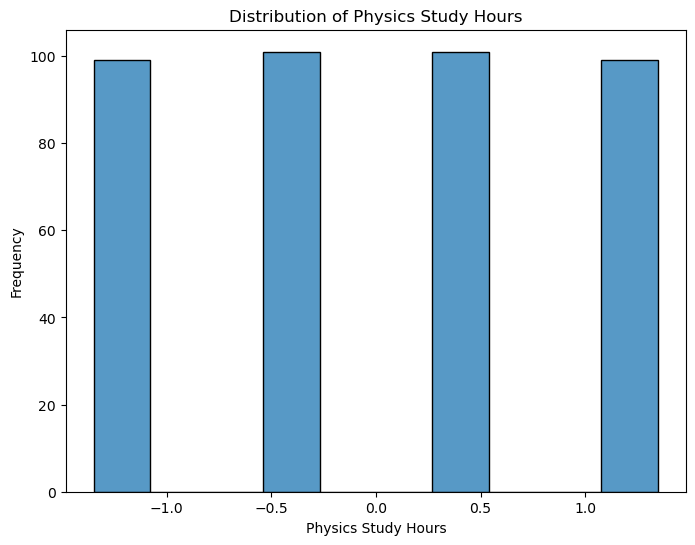

In [26]:
# Explore the distribution of the 'Physics Study Hours' column
plt.figure(figsize=(8, 6))
sns.histplot(df['Physics Study Hours'], bins=10)
plt.xlabel('Physics Study Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Physics Study Hours')
plt.show()

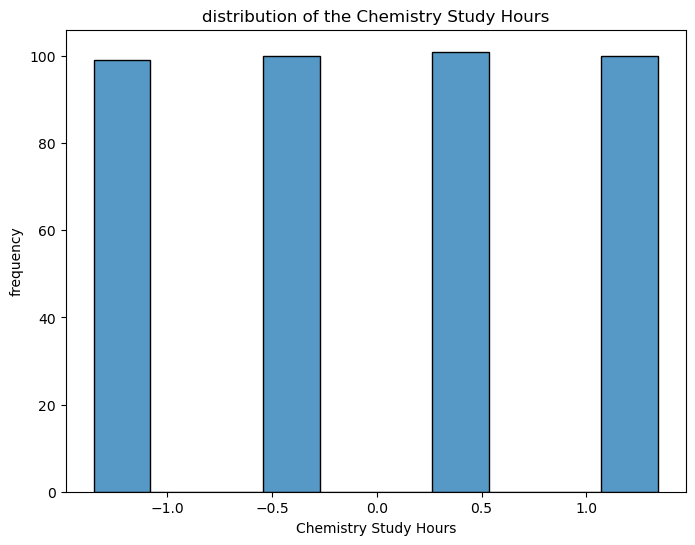

In [27]:
# explore the chemistry study hours cols
plt.figure(figsize=(8,6))
sns.histplot(df['Chemistry Study Hours'],bins=10)
plt.xlabel('Chemistry Study Hours')
plt.ylabel('frequency')
plt.title('distribution of the Chemistry Study Hours')
plt.show()

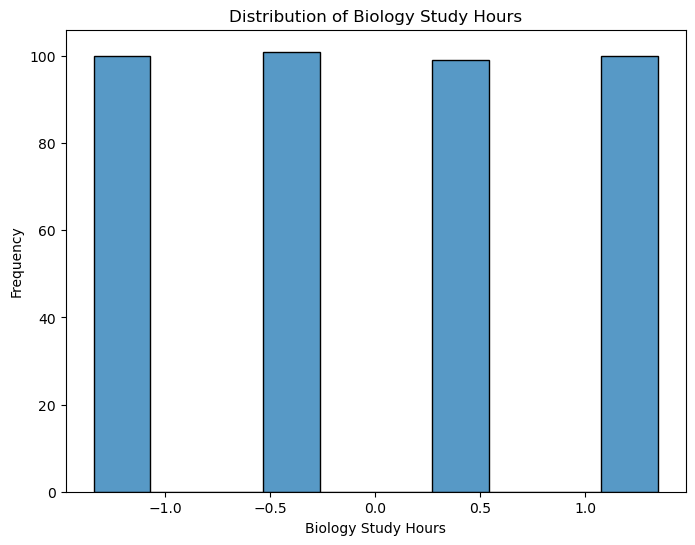

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df['Biology Study Hours'],bins=10)
plt.xlabel('Biology Study Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Biology Study Hours')
plt.show()


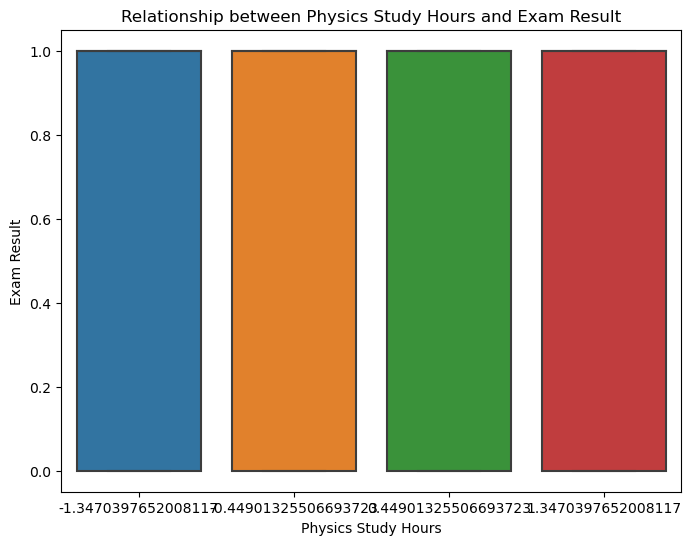

In [29]:
# Explore the relationship b/w study hours and Exam Result
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Physics Study Hours',y='Exam Result')
plt.xlabel('Physics Study Hours')
plt.ylabel('Exam Result')
plt.title('Relationship between Physics Study Hours and Exam Result')
plt.show()

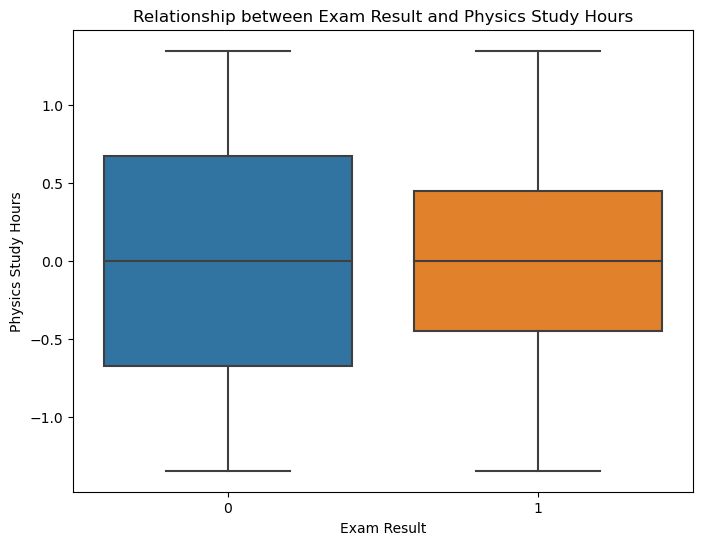

In [30]:
# Explore the relationship between study hours and exam result
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Exam Result', y='Physics Study Hours')
plt.xlabel('Exam Result')
plt.ylabel('Physics Study Hours')
plt.title('Relationship between Exam Result and Physics Study Hours')
plt.show()

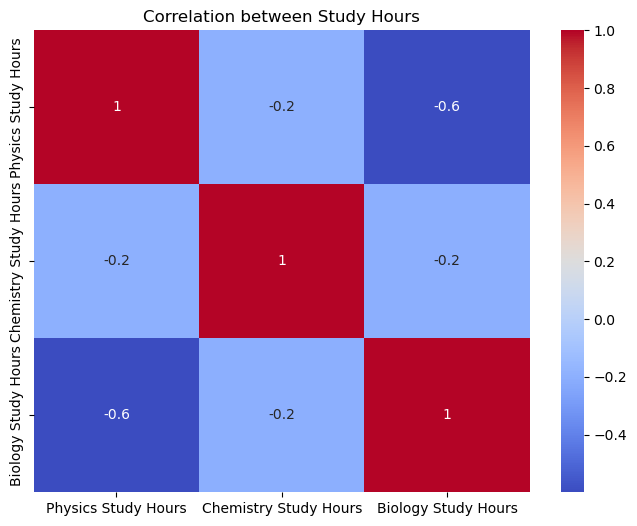

In [31]:
# Explore the correlation between study hours
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Physics Study Hours', 'Chemistry Study Hours', 'Biology Study Hours']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Study Hours')
plt.show()

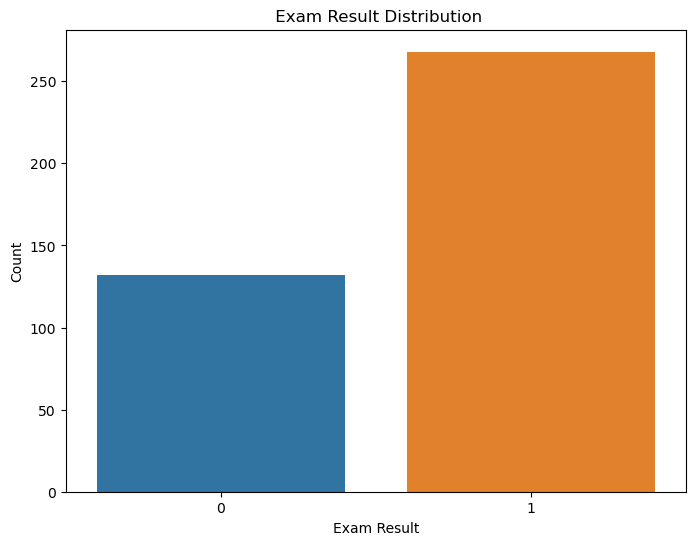

In [32]:
# Bar plot of result
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exam Result')
plt.xlabel('Exam Result')
plt.ylabel('Count')
plt.title(' Exam Result Distribution')
plt.show()

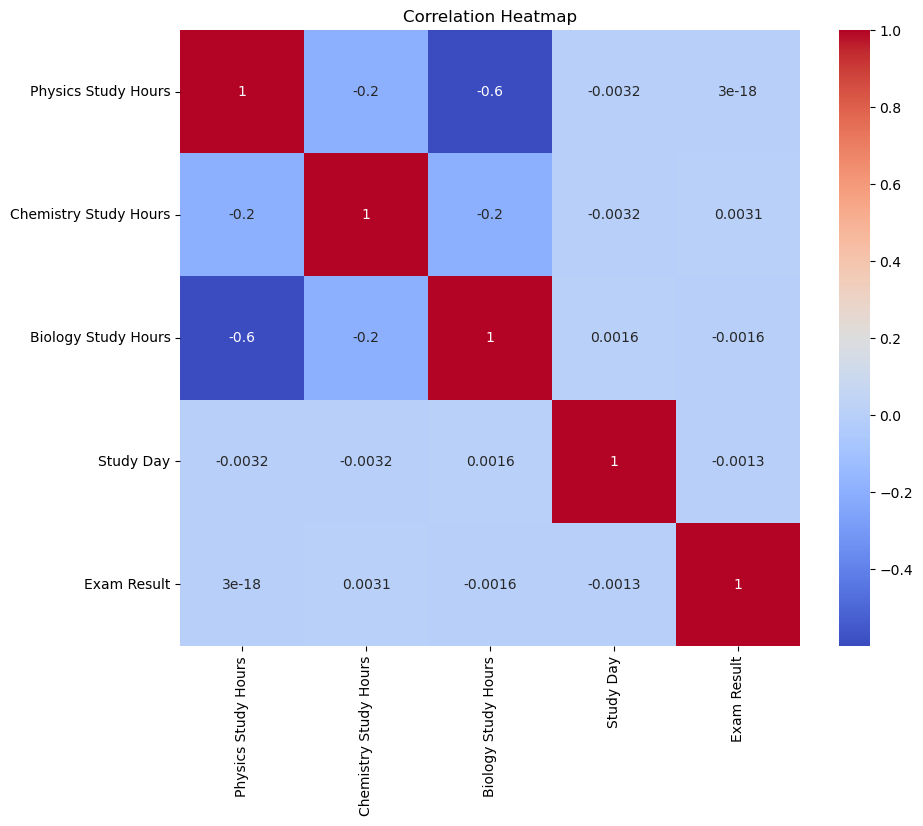

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

eda and data cleaning completed then apply ML algorithms and find best accuracy

In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [35]:
# Split the datasets into features X and target variable y
X=df.drop('Exam Result',axis=1)
y=df['Exam Result']

In [36]:
X

,Physics Study Hours,Chemistry Study Hours,Biology Study Hours,Study Day
0,-0.449013,0.443634,-0.444979,1
1,0.449013,-0.452596,-0.444979,3
2,-0.449013,0.443634,1.343880,1
3,0.449013,1.339864,-1.339408,3
4,1.347040,-1.348827,-0.444979,4
...,...,...,...,...
395,0.449013,1.339864,-1.339408,2
396,1.347040,-1.348827,-0.444979,0
397,-1.347040,-0.452596,0.449451,1
398,-0.449013,0.443634,1.343880,3


In [37]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    0
398    1
399    1
Name: Exam Result, Length: 400, dtype: int64

In [38]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# Initialize the machine learning model
models=[
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('xgboost',xgb.XGBClassifier())
]


In [41]:
# train evaluate each algorithms
results=[]
for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    results.append((name,accuracy))
# Sort the results by accuracy in descending order
results.sort(key=lambda x: x[1], reverse=True)


In [42]:
# Print the results
for name, accuracy in results:
    print(f'{name}: {accuracy}')


Logistic Regression: 0.625
Decision Tree: 0.625
Random Forest: 0.625
Support Vector Machine: 0.625
xgboost: 0.625
K-Nearest Neighbors: 0.5625


In [43]:
# Select the best algorithm based on accuracy
best_algorithm, best_accuracy = results[0]
print(f'\nBest Algorithm: {best_algorithm}')
print(f'Accuracy: {best_accuracy}')


Best Algorithm: Logistic Regression
Accuracy: 0.625


the maximum accuracy of the model is 62%

In [69]:
from sklearn.ensemble import VotingClassifier

# Initialize multiple XGBoost models with different hyperparameters
model1 = xgb.XGBClassifier(learning_rate=0.001, max_depth=5, n_estimators=300)
model2 = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)

In [70]:
# Create an ensemble using a VotingClassifier
ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2)])

In [71]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [72]:
# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

In [73]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


In [74]:
from sklearn.linear_model import LogisticRegressionCV

# Apply L1 regularization with cross-validation
model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
model.fit(X_train, y_train)


LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [75]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling to the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression on the scaled features
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with f_classif to select top k features
k = min(10, X_train.shape[1])  # Set k as the minimum between 10 and the number of features
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit logistic regression on the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)


LogisticRegression()

In [84]:
! pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 23.7 MB/s eta 0:00:00


In [85]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit logistic regression on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [ ]:
y_pred=model.predict(y_test,y_pred)
score=accuracy_sc